<a href="https://colab.research.google.com/github/Arghaweeb/Deep_Learning-A-Z/blob/main/RNN_Google_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

### Importing the training set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Feature Scaling

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #to create a numpy array since NN needs numpy array
print(training_set)


[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = [] #60 previous stock prices
y_train = [] #Next stock prices
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))  # input shape -> (batch_size, timesteps, input_dim)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) #20% of the neuron will be ignored during training

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs=100, batch_size = 32 )

Epoch 1/100
38/38 [==============================] - 13s 125ms/step - loss: 0.0362
Epoch 2/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0045
Epoch 6/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0049
Epoch 8/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0044
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv') #For january
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = [] #60 previous stock prices
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test= np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # to reverse the scalling

1/1 [==============================] - 2s 2s/step


### Visualising the results

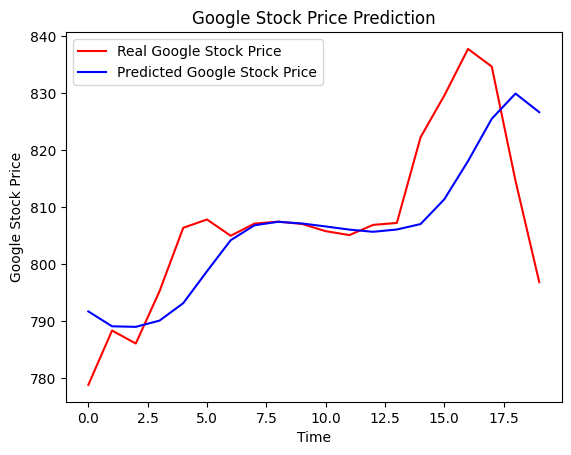

In [ ]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()